<a href="https://colab.research.google.com/github/Javortper/My-neural-networks-studies/blob/master/Generative_Adversial_Networks_(GANs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción del notebook

En este Notebook recogeré información teórica sobre las GANs. Mi idea es entender bien como funcionan y a partir de ahi intentar implementar una por mi cuenta. 

Recursos usados:

[A Gentle Introduction to Generative Adversarial Networks ](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)

[A Beginner's Guide to Generative Adversarial Networks (GANs)](https://skymind.ai/wiki/generative-adversarial-network-gan)

[Understanding Generative Adversarial Networks (GANs)](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29)

[Generative Adversarial Network(GAN) using Keras](https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3)







##DUDAS y TODOs

-¿Qué es mejor usar de ruido, [-1,1] o [0,1]?

-¿Como funciona el loss del generador y el discriminador?¿Como deben evoluciona?


#Parte teórica: fundamentos de las GANs


##¿Que son los Generative Adversarial Networks?

Los Generative Adversarial Networks (GANs) o redes generativas antagónicas en español, son modelos de Deep Learning basados en modelos generadores. Las GANs son modelos con arquitecturas para entrenar un modelo generador y la mayoria de veces se hace uso de modelos de Deep Learning para esta arquitectura.

La primera arquitectura GAN se mostró en 2014 en el paper de Ian Goodfellow titulado ["Generative Adversarial Networks](https://arxiv.org/abs/1406.2661)

Un modelo GAN hace uso de dos submodelos. Un modelo **generador** para crear nuevos ejemplos y un modelo **discriminador** para clasificar ejemplos como reales o falsos (generados por el generator).

```
*Generative adversarial networks are based on a game theoretic scenario in which the generator network must compete against an adversary. The generator network directly produces samples. Its adversary, the discriminator network, attempts to distinguish between samples drawn from the training data and samples drawn from the generator.*
```
-Cita del libro Deep Learning, página 699. 



## ¿Cómo funcionan las GANs?

El modelo **generador** crea nuevos ejemplos de datos mientras que el **discriminador** evalua su autenticidad. Es decir, el generador busca engañar sin ser pillado y el el discriminador intenta identificar aquellas imágenes que vienen del generador como falsas.

Los pasos que hace un GAN son:
1.   El generador toma un número aleatorio y devuelve una imagen.
2.   La imagen generada se pasa al discriminador junto  a una secuencia de imágenes reales.
3.   El disciminador clasifica como reales o falsas y devuelve probabilidades entre 0 y 1, siendo 1 predicción de aunténtica y 0 falsa.

Para el caso de MNIST, la red discrimandora es una red convolucional estandar que puede clasificar imagenes como reales o falsas. El generador es basicamente lo inverso a una red convolucional, mientras que la convolucional toma imágenes y le hace downsampling (capa de Pooling) obtener una probabilidad, el generador toma un vector de ruido aleatorio y le aplica "upsampling" para obtener una imagen.

Las dos redes buscan optimizar diferentes funciones objetivos o funciones de perdida. Funcionando como un [juego de suma cero](https://es.wikipedia.org/wiki/Juego_de_suma_cero). Esto es basicamente un **actor-critic model**(buscar información), donde cambios en el discriminador provoca cambios en el generador y viceversa. 

![Ejemplo de GAN funcionando con MNIST. Recurso tomado de https://www.freecodecamp.org/news/an-intuitive-introduction-to-generative-adversarial-networks-gans-7a2264a81394/](https://cdn-media-1.freecodecamp.org/images/m41LtQVUf3uk5IOYlHLpPazxI3pWDwG8VEvU)

En definitiva:


*   El generador busca maximizar la probabilidad de que el discriminador falle.
*   El disciminador guía al generador para producir imágenes mas realistas.




##Profundizando en el funcionamiento

###El modelo generador

[Información tomada de este artículo](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/).

El generador toma como entrada una variable aleatoria y genera una muestra dentro del dominion.

El vector se genera aleatoriamente a partir de una distribución Gaussiana. Este vector alimenta el proceso de generar una imagen. Despues del entrenamiento, los puntos del espacio de este vector multidimensional corresponderan con puntos dentro del dominio del problema, formando una representación comprimida de la distribución de la información.

Este vector espacio se denomina como "latent space" o "vector space comprised of [latent variables](https://en.wikipedia.org/wiki/Latent_variable). Latent variables o variables ocultas son unas variables importantes para el dominio pero que no son observables directamente.

Muchas veces nos referimos a estas latent variables o latent space como una proyección o compresión de una distribución de datos. 

```
"That is, a latent space provides a compression or high-level concepts of the observed raw data such as the input data distribution. In the case of GANs, the generator model applies meaning to points in a chosen latent space, such that new points drawn from the latent space can be provided to the generator model as input and used to generate new and different output examples."

```

### El modelo discriminador
El modelo discriminador toma un ejemplo del dominio como entrada (real o generado) y predice una clase binaria con la etiqueta de "real" o "fake".

Los ejemplos reales vienen del training dataset y los generador del modelo generador.

El modelo discriminador es basicamente un modelo de clasificación estandar que hace uso de una CNN para la clasificación.

### GANs como un juego de dos jugadores

Los dos modelos, G y D, se entrenan juntos. El generador crear batches de muestras, y estos, junto a ejemplos reales del dominio se pasan al descriminador para que los clasifique. Despues de esto el discriminador se actualiza para hacer mejores discriminaciones de real y falso en la siguiente ronda, y además, importante, el generador se actualiza basado en como de bien o mal las muestras generadas engañan al discriminador. De esta manera, mirándolo desde una perspectiva de teoría de juegos, los dos modelos serían adversarios jugando a un [juego de suma cero](https://en.wikipedia.org/wiki/Zero-sum_game) Citando a Goodfellows en su tutorial de GANs en el NIPS 2016: *"Because the GAN framework can naturally be analyzed with the tools of game theory, we call GANs "adversarial""*

En esto caso, suma cero sería cuando el discriminador identifica correctamente las muestras reales  y falsas, y no es necesario realizar actualizaciones en los parametros del generador mientras que el generador es penalizado con acttualizaciones.

Alternativamente, cuando el generador miente al discriminador, se premia, o no se necesitan cambios en los parametros del modelo pero el discriminador debe ser penalzado con actualizaciones.

Como limite, el generador genera replicas perfectas cada vez y el discriminador no puede encontrar diferencias y predice "inseguro" (0.5) en cada caso. Esto es un caso ideal, no es necesario que nuestro modelo llegue a tal punto.



# Parte práctica: Implementación en Keras
[Libro - Deep Learning with Python.](http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf)

[MEDIUM - Generative adversarial networks using Keras](https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3)

[Artículo - GAN by Example using Keras on Tensorflow Backend](https://towardsdatascience.com/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0)

[Artículo - DCGAN Implementation in Keras explained](https://medium.com/@ramyahrgowda/dcgan-implementation-in-keras-explained-e1918fc930ea)

[Artículo científico - Unsupervised Representation Learning With Deep Convolutional Generative Adversarial Networks](https://arxiv.org/pdf/1511.06434.pdf)

Haremos la implementación del GAN en Keras. Concretamente haremos una DCGAN, (DC viene de deep convolutional). Esto es una GAN donde el generador y discriminador son redes convolucionales. Usaremos una capa Conv2DTranspose para hacer upsampling en el generador.

Usaremos el Dataset CIFAR10 (**CAMBIAR, MNIST**) pero sólo con la clase "rana". Esquemáticamente la GAN se mostrará tal que así:
1.   Un *generador* que mapee un vector unidimensional de shape 100 a imágenes (28,28,1).
2.   Un *discriminador* que devuelva la probabilidad de que una imagen  sea real.
3.   Una red *gan* que una al generador y al discriminador con gan(X) = discriminator(generator(X)). Con esto el gan evaluará el realismo del generador. DUDA
4.   Entrenaremos el discriminador usando ejemplos reales y falsos con etiquetas "real"/"fake" igual que cualquier clasificador de imágenes.
5.   Para entrenar el generador, usaremos el gradiente de los pesos del generador respecto a la función pérdida del modelo *gan*. Eso significa, que en cada paso, **modificaremos los pesos del generador en una dirección donde el discriminador clasifica como "real" las imagenes decodificadas por el generador**. En otras palabras, entrenamos el generador para engañar al discriminador.

### Pequeños tricks

El proceso de entrenar las GANs y ajustarlas es dificil. Hay varios truquitos que deberiamos tener en cuenta. 

*   Usar *tanh* en la última activación del generador en vez de *sigmoid*.** Buscar el por qué.**
*   Samplearemos puntos del espacio usando *normal distribution* (Gaussion distribution), no uniform distribution. **Informarse de esto**.
*   Estocasticidad es buena para conseguir robustez. Esto es debido a que el resultado del entrenamiento de una GAN es un equilibrio dinámico, las GANs son propensas a atascarse de muchas maneras. Introducir aleatoriedad durante el entrenamineot ayuda a prevenir esto. Esta aleatoriedad la introduciremos de dos maneras: usando **dropout** en el discriminador y añadiendo ruido aleatorio a las etiquetas para el discriminador.

*   Operaciones de *MaxPooling* y activaciones *ReLu* pueden producir un gradiente escaso. En vez de max pooling se recomienda usar **strided convolutions** y en vez de activación *ReLu* usar *LeakyRelu*. Esta es parecida a *ReLu* pero estas nunca llegan a cero de tal manera que el gradiente nunca termina de pararse. **BUSCAR INFO**
*   En las imagenes generadas es comun ver ciertos artifacts causados por no se cubrir todo el espacio de pixeles en el generador. Para arreglar esto, usaremos un tamaño de kernel que sea divisible por el stride (o paso/salto) cuando usemos strided *Conv2DTranspose* o *Conv2D* tanto en el generador como el discriminador.














### El generador

Primero desarrollaremos el **modelo generador** que transforme un vector (from the latent space during training it will be sampled at random) a una imagen candidata. Uno de los principales problemas de las GANs es que el generador quede atascado con las imágenes generadas que parezcan ruido. Una posible solución es usar dropout tanto en el discriminador como el generador.

![Imagen obtenida de https://medium.com/@ramyahrgowda/dcgan-implementation-in-keras-explained-e1918fc930ea](https://miro.medium.com/max/955/1*deJwkHRrQqY2bUfHPG9Ipw.png)

El vector de ruido lo metemos a una fully connected layer de 7x7x256. Esta tendrá una salida con función de activación **Leaky ReLU** y funcion de **Batch Normalization**.

![Dentro del generador](https://miro.medium.com/max/1364/1*wAb-J_qTptaHDUPufynM2g.png)

####¿Cómo aprende el generador?
Una de las cosas más interesantes de las GANs es como mejora el generador para crear imágenes más reales. El meollo aquí es que aprende la red para pasar de un vector ruido a una imagen. Esto esta en la fully connected layer, debe aprender a realizar distribuciones semejantes a las de las imágenes reales. **BUSCAR INFORMACIÓN**



-Hemos metido un dropout despues de la fully connected

-Hemos cambiado orden del leaky y batchnormalization

-Tamaño krnel a (4,4)

-El generador no se compila al final. La compilación la hace ya todo el gan y ahi le damos un optimizador.

In [0]:
from keras.models import Sequential
from keras.layers import Reshape, MaxPooling2D, Dropout, Flatten, Dense, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Activation
import numpy as np
from keras.optimizers import Adam, SGD

generator = Sequential()

#Vector ruido a fully connected layer
generator.add(Dense(7*7*256, input_dim=100))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 256)))
generator.add(Dropout(0.4))



#Primera capa Convolucional transpuesta
generator.add(Conv2DTranspose(filters=128, kernel_size=(4,4),
                              strides=(1, 1), padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.2))



#2nda convolución
generator.add(Conv2DTranspose(filters=64, kernel_size=(4,4),
                              strides=(2, 2), padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.2))

#3ra convolución
generator.add(Conv2DTranspose(filters=1, kernel_size=(4,4),
                              strides=(2, 2), padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.2))

#Capa de activación Tanh
generator.add(Activation('tanh'))


#Instanciamos el modelo con entrada con shape (latent_dim,) into a imagen de shape (32,32,3)
generator.summary()

opt = Adam(lr=0.0002, beta_1=0.5)
generator.compile(loss='binary_crossentropy', optimizer=opt)

Using TensorFlow backend.
W0809 16:14:58.438912 139922714285952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 16:14:58.458427 139922714285952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 16:14:58.460669 139922714285952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 16:14:58.537479 139922714285952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12544)             50176     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 128)         524416    
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 128)         512       
__________

Vamos a probar a usar el generador (que aun no está entrenado) para generar una imagen de ejemplo.

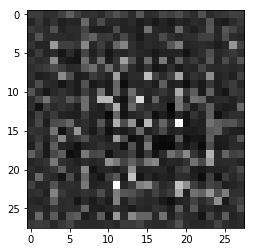

In [0]:
import matplotlib.pyplot as plt

noise = np.random.normal(-1,1, (1, 100))
imagen_generada = generator.predict(noise, batch_size=1)
plt.imshow(imagen_generada[0, :, :, 0], cmap='gray')


### El discriminador

Ahora haremos haremos el *discriminador* el cual toma una imagen (real o generada) y la clasifica a una de estas dos calses: "real image" o "generated image". Paa MNIST tendrá una entrada de (28,28,1). La diferencia de una CNN estandar es la ausencia de max-pooling en las capas intermedias. En vez de esto usaremos las strided convolutions para el downsampling. 

![texto alternativo](https://miro.medium.com/max/1364/1*QY1ghK_mS_szHkB7GPWO_A.png)



-HEMOS CAMBIADO orden batchnorm y leaky

-Hemos quitado batch norm de la primera capa

-Añadido una tercera capa convolucional

-Hay que añadir capa de pooling tras la convolucional?

In [0]:
discriminator = Sequential()

#Primera capa convolucional
discriminator.add(Conv2D(input_shape = (28,28,1), filters=64,
                         kernel_size=(5,5), strides=(2,2), padding='same'))
#discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(alpha=0.2))
#discriminator.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa convolucional
discriminator.add(Conv2D(filters=128,kernel_size=(5,5), strides=(2,2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.4))
#discriminator.add(MaxPooling2D(pool_size=(2, 2)))

#Tercera capa convolucional2
discriminator.add(Conv2D(filters=256,kernel_size=(5,5), strides=(2,2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.4))

#Capa flatten
discriminator.add(Flatten())

#Fully connected layer
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.summary()

optimizador= Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         819456    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 4, 4, 256)         0         
__________

### Adversarial network

Finalmente vamos a preparar el GAN, que une el generador y el discriminador. Entrenar el gan actualizará los pesos del generador de tal manera que haga que el discriminador prediga como "real" las imagenes que genera. Es muy importante poner el discriminador como frozen durante el entrenamiento. Sus pesos no deben ser actualizados cuando entrenamos el gan. Si los pesos del discriminador se actualizan durante el proceso, entoncesestariamos entrenando el discriminador para que seimpre prediga como "real", y esto no es lo que queremos.

**Importante**: 

Aquí debemos usar la clase Model de Keras. Para la entrada le daremos la entrada del generador y la salida la salida del discriminador.

In [0]:
from keras.models import Model
from keras.layers import Input

#Desactivamos entrenamiento para el discriminador
discriminator.trainable = False

#Unimos D y G para crear la red GAN
gan_input = Input(shape=(100,)) #Generamos un tensor para la entrada de la red
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs=gan_input, outputs=gan_output)
gan.compile(loss='binary_crossentropy', optimizer=opt)

gan.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         1974469   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1030145   
Total params: 3,004,614
Trainable params: 1,948,995
Non-trainable params: 1,055,619
_________________________________________________________________


###Entrenamiento

En el entrenamiento se **entrenan conjuntamente** el modelo generador y discriminador. En cada **epoch** hacemos los siguientes pasos:

Para cada **epoch**:

  -Para cada **batch**:

1.   Entrenamos el discriminador.
2.   Entrenamos el generador (es decir, entrenamos el GAN con el entrenamiento del discriminador desactivado).

Primero **entrenamos el discriminador** en solitario. Para esto le meteremos dos batches por epoch **batch con imagenes reales y batch con imagenes generadas** con el generador. Las imágenes reales tendrán una etiqueta de 1 y las falsas de 0. De entrenar el discriminador con dos batch de diferentes clases obtendremos dos funciones loss, una para la pérdida que tiene el discriminador con las imagenes reales y otra con los aciertos. Para sacar el loss total haremos la media. Otro posible método sería usar un batch completo 50% real y 50% generado y obtendriamos solo una función loss. Como cualquier CNN estandar vaya.

Segundo **entrenamos el GAN** con el aprendizaje en el generador **desactivado**. Es decir, como imagen de entrenamiento usaremos un vector de ruido aleatorio cuya etiqueta será '1' (para que el generador se acerque a aqueellas clasificaciones que el discriminador hace como '1' o 'real') y la salida que dará el GAN serán un valor entre 0 y 1, es decir, la salida que da el discriminador. 

De esta forma vamos entrenando poco a poco el el generador y el discriminador consiguiendo poco a poco imágenes más parecidas al dominio de problemas.

**Importante:**

-Para el ruido usamos np.random.normal el cual crea un vector aleatorio con **distribución gaussiana**.

-Para hacer un **GIF** con la evolución de las imagenes que crea el GAN y una mejor visualización de como mejora la red crearemos el **vector ruido con una semilla**, de este modo siempre usaremos el mismo.

-Para el gif usaremos imageio.


In [0]:

def show_sample(noise):
  imagen_generada = generator.predict(noise, batch_size=1)
  plt.imshow(imagen_generada[0, :, :, 0], cmap='gray')
  plt.show()

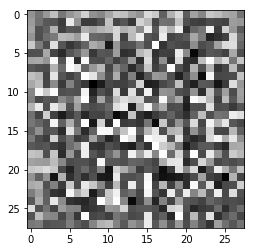

Epoch 0, Discriminator loss: 0.6983824968338013, Generator loss: 0.6719878911972046


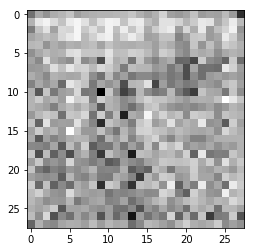

Epoch 1000, Discriminator loss: 0.00029056522180326283, Generator loss: 13.14969253540039


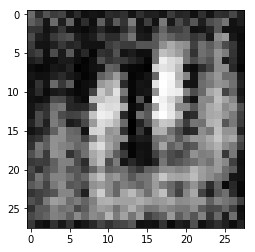

Epoch 2000, Discriminator loss: 0.0014557460090145469, Generator loss: 12.607677459716797


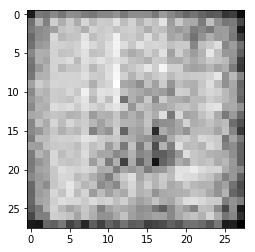

Epoch 3000, Discriminator loss: 0.00039357005152851343, Generator loss: 12.034948348999023


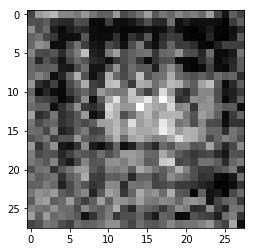

Epoch 4000, Discriminator loss: 0.0011539600091055036, Generator loss: 15.062939643859863


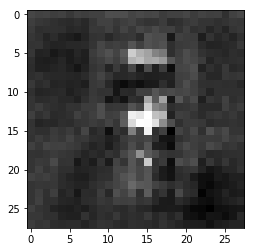

Epoch 5000, Discriminator loss: 0.00011319162149447948, Generator loss: 8.299933433532715


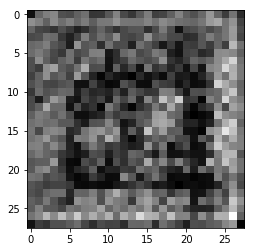

Epoch 6000, Discriminator loss: 0.0046776896342635155, Generator loss: 15.542160034179688


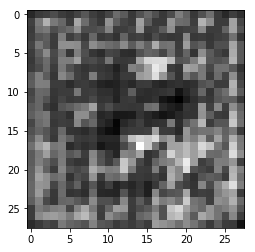

Epoch 7000, Discriminator loss: 0.0004233914369251579, Generator loss: 12.854059219360352


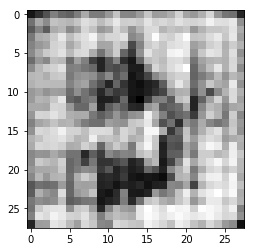

Epoch 8000, Discriminator loss: 0.0005389106227084994, Generator loss: 13.979413986206055


KeyboardInterrupt: ignored

In [0]:
from keras.datasets import mnist
import random
import tensorflow as tf

SAVE_FREQ = 1000
epochs = 10000
batch_size = 128
half_batch_size = batch_size//2
#np.random.seed(1)
#Ruido generado para la evolucion
static_noise = np.random.normal(-1,1, (1, 100))

#Cargamos los datos
(x_train, y_train), (_, _) = mnist.load_data()
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train = X_train / 127.5 - 1.

for epoch in range(epochs):
  #-------------
  #DISCRIMINADOR
  #-------------
  
  #Creamos un batch para cada clase
  noise = np.random.normal(-1,1, (half_batch_size, 100))
  imagenes_generadas = generator.predict(noise)
  idx = np.random.randint(0,X_train.shape[0],half_batch_size)
  imagenes_reales = X_train[idx]
    
  #Creamos las etiquetas
  fake_labels = np.zeros((half_batch_size,1)) #Etiquetas img generadas
  real_labels = np.ones((half_batch_size,1)) #Etiquetas img reales

  #Entrenamos y obtenemos los diferentes loss
  discriminator.trainable = True
  d_loss_real = discriminator.train_on_batch(imagenes_reales, real_labels)
  
  d_loss_fake = discriminator.train_on_batch(imagenes_generadas, fake_labels)
  
  d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

  #-------------
  #GENERADOR
  #-------------  
  
  discriminator.trainable = False
  #Introducimos vector ruido con etiqueta 1
  labels = np.array([1]*batch_size)
  noise = np.random.normal(-1,1, (batch_size, 100)) #32 vectores ruidos (1 epoch) de dimension 100
  gan_loss = gan.train_on_batch(noise, labels)

  #Visualización del entrenamiento
  #plotGeneratedImages(epoch)
  if epoch % SAVE_FREQ == 0:
    show_sample(static_noise)
    print(f"Epoch {epoch}, Discriminator loss: {d_loss}, Generator loss: {gan_loss}")  


In [0]:
# Probamos la discriminadora
idx = np.random.randint(0,X_train.shape[0],half_batch_size)
batch_reales = X_train[idx]
discriminator.predict(batch_reales)

In [0]:
noise_a=np.random.normal(-1,1, (1, 100))
generada = generator.predict(noise_a, verbose=1)
generada = generada*127.5+127.5
plt.imshow(generada[0, :, :, 0], cmap='gray')

